# feature engineering project 
* حسن محمد عيدان
* محمد عادل جودة

# **import libraries**

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

from nltk.tag import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans  
from sklearn.metrics import  classification_report, confusion_matrix,accuracy_score


# import dataset

In [53]:
pd.set_option('display.max_colwidth', None)
DATASET_COLUMNS=['target','ids','date','flag','user','text']
df = pd.read_csv('/kaggle/input/training1600000processednoemoticon/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=DATASET_COLUMNS)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


# Data Cleaning & Preprocessing


In [54]:
#Shape of dataset
df.shape

(1600000, 6)

In [55]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [56]:
#Checking the NULL values
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

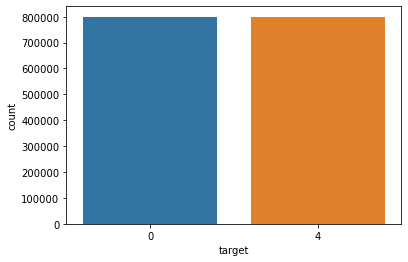

In [57]:
# distribution of the texts in our dataset
df['target'].value_counts()
sns.countplot(x='target' , data=df)

In [58]:
df.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [59]:
# drop useless columnms
df=df.drop(columns=['ids','flag', 'user','date'])

In [60]:
# make target values (0,1)
df['target'] = df['target'].replace(4,1)

In [61]:
# Converting to Lower Case
df['text']=df['text'].str.lower()

# * Handling Duplicate Tweets 

In [62]:
#Checking duplicated
df.duplicated().sum()

20214

In [63]:
#drop duplicated
df.drop_duplicates(inplace=True)
df.shape

(1579786, 2)

In [64]:
#final Count of Tweets after Removal
df['target'].value_counts()

1    791822
0    787964
Name: target, dtype: int64

In [65]:
#Cleaning UserNames
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df['text'] = df['text'].apply(lambda x: clean_username(x))
df

,target,text
0,0,"http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d"
1,0,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!
2,0,i dived many times for the ball. managed to save 50% the rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there."
...,...,...
1599995,1,just woke up. having no school is the best feeling ever
1599996,1,thewdb.com - very cool to hear old walt interviews! â« http://blip.fm/~8bmta
1599997,1,are you ready for your mojo makeover? ask me for details
1599998,1,happy 38th birthday to my boo of alll time!!! tupac amaru shakur


In [66]:
#Cleaning URLs
def clean_url(data):
    data = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', data)
            return re.sub(r'/', ' / ', data)
df['text'] = df['text'].apply(lambda x: clean_url(x))

In [67]:
# Cleaning Emojis
def clean_emoji(data):    
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    
    return data
df['text'] = df['text'].apply(lambda x: clean_emoji(x))
df

,target,text
0,0,"- awww, that's a bummer. you shoulda got david carr of third day to do it. <smile>"
1,0,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!
2,0,i dived many times for the ball. managed to save 50% the rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there."
...,...,...
1599995,1,just woke up. having no school is the best feeling ever
1599996,1,thewdb.com - very cool to hear old walt interviews! â« ~8bmta
1599997,1,are you ready for your mojo makeover? ask me for details
1599998,1,happy 38th birthday to my boo of alll time!!! tupac amaru shakur


# ************************

# Tokenization

In [68]:
import time
t = time.process_time()
df1=df
df1['sent']=df1['text'].apply(sent_tokenize)
df1['word']=df1['text'].apply(word_tokenize)
print(f'Tokenize Finished !')
print(f'CPU Time Taken: {round(time.process_time()-t)} seconds')

Tokenize Finished !
CPU Time Taken: 413 seconds


# Remove STOPWORDS & lem & snowball

In [69]:
# Defining Stopwords 
STOPWORDS = set(stopwords.words('english'))
#snowball
snowball_stemmer = SnowballStemmer("english")

def tweet_cleaner(tweet_tokens):
    cleaned_tokens = []
    for token, tag in pos_tag(tweet_tokens):
        # Checking for POS label and converting it for Lemmatizer input
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
            
        #Init Lemmatizer   
        tweet_lemmatizer = WordNetLemmatizer()
        cleaned_token = tweet_lemmatizer.lemmatize(token, pos)
        # Snowball
        cleaned_token = snowball_stemmer.stem(token)
        
        #Checking for punctuation, word lenght less than 2 then removing stopwords 
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOPWORDS:
            cleaned_tokens.append(cleaned_token)
    return cleaned_tokens

In [70]:
df1['cleaned_tweets'] = df1['word'].apply(tweet_cleaner)
print(f'Cleaning Finished !')
print(f'CPU Time Taken: {round(time.process_time()-t)} seconds')

Cleaning Finished !
CPU Time Taken: 2483 seconds


In [71]:
# Display data after the remove stop words and apply snowball
df1

,target,text,sent,word,cleaned_tweets
0,0,"- awww, that's a bummer. you shoulda got david carr of third day to do it. <smile>","[ - awww, that's a bummer., you shoulda got david carr of third day to do it., <smile>]","[-, awww, ,, that, 's, a, bummer, ., you, shoulda, got, david, carr, of, third, day, to, do, it, ., <, smile, >]","[awww, bummer, shoulda, got, david, carr, third, day, smile]"
1,0,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,"[is upset that he can't update his facebook by texting it... and might cry as a result school today also., blah!]","[is, upset, that, he, ca, n't, update, his, facebook, by, texting, it, ..., and, might, cry, as, a, result, school, today, also, ., blah, !]","[upset, n't, updat, facebook, text, ..., might, cri, result, school, today, also, blah]"
2,0,i dived many times for the ball. managed to save 50% the rest go out of bounds,"[ i dived many times for the ball., managed to save 50% the rest go out of bounds]","[i, dived, many, times, for, the, ball, ., managed, to, save, 50, %, the, rest, go, out, of, bounds]","[dive, mani, time, ball, manag, save, rest, bound]"
3,0,my whole body feels itchy and like its on fire,[my whole body feels itchy and like its on fire],"[my, whole, body, feels, itchy, and, like, its, on, fire]","[whole, bodi, feel, itchi, like, fire]"
4,0,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.","[ no, it's not behaving at all., i'm mad., why am i here?, because i can't see you all over there.]","[no, ,, it, 's, not, behaving, at, all, ., i, 'm, mad, ., why, am, i, here, ?, because, i, ca, n't, see, you, all, over, there, .]","[behav, mad, whi, becaus, n't, see]"
...,...,...,...,...,...
1599995,1,just woke up. having no school is the best feeling ever,"[just woke up., having no school is the best feeling ever]","[just, woke, up, ., having, no, school, is, the, best, feeling, ever]","[woke, school, best, feel, ever]"
1599996,1,thewdb.com - very cool to hear old walt interviews! â« ~8bmta,"[thewdb.com - very cool to hear old walt interviews!, â« ~8bmta]","[thewdb.com, -, very, cool, to, hear, old, walt, interviews, !, â, «, ~8bmta]","[thewdb.com, veri, cool, hear, old, walt, interview, ~8bmta]"
1599997,1,are you ready for your mojo makeover? ask me for details,"[are you ready for your mojo makeover?, ask me for details]","[are, you, ready, for, your, mojo, makeover, ?, ask, me, for, details]","[readi, mojo, makeov, ask, detail]"
1599998,1,happy 38th birthday to my boo of alll time!!! tupac amaru shakur,"[happy 38th birthday to my boo of alll time!!!, tupac amaru shakur]","[happy, 38th, birthday, to, my, boo, of, alll, time, !, !, !, tupac, amaru, shakur]","[happi, 38th, birthday, boo, alll, time, tupac, amaru, shakur]"


* Reset Index after remove stop words and apply snowball

In [72]:
df1=df1.reset_index(drop=True)
df1

,target,text,sent,word,cleaned_tweets
0,0,"- awww, that's a bummer. you shoulda got david carr of third day to do it. <smile>","[ - awww, that's a bummer., you shoulda got david carr of third day to do it., <smile>]","[-, awww, ,, that, 's, a, bummer, ., you, shoulda, got, david, carr, of, third, day, to, do, it, ., <, smile, >]","[awww, bummer, shoulda, got, david, carr, third, day, smile]"
1,0,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,"[is upset that he can't update his facebook by texting it... and might cry as a result school today also., blah!]","[is, upset, that, he, ca, n't, update, his, facebook, by, texting, it, ..., and, might, cry, as, a, result, school, today, also, ., blah, !]","[upset, n't, updat, facebook, text, ..., might, cri, result, school, today, also, blah]"
2,0,i dived many times for the ball. managed to save 50% the rest go out of bounds,"[ i dived many times for the ball., managed to save 50% the rest go out of bounds]","[i, dived, many, times, for, the, ball, ., managed, to, save, 50, %, the, rest, go, out, of, bounds]","[dive, mani, time, ball, manag, save, rest, bound]"
3,0,my whole body feels itchy and like its on fire,[my whole body feels itchy and like its on fire],"[my, whole, body, feels, itchy, and, like, its, on, fire]","[whole, bodi, feel, itchi, like, fire]"
4,0,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.","[ no, it's not behaving at all., i'm mad., why am i here?, because i can't see you all over there.]","[no, ,, it, 's, not, behaving, at, all, ., i, 'm, mad, ., why, am, i, here, ?, because, i, ca, n't, see, you, all, over, there, .]","[behav, mad, whi, becaus, n't, see]"
...,...,...,...,...,...
1579781,1,just woke up. having no school is the best feeling ever,"[just woke up., having no school is the best feeling ever]","[just, woke, up, ., having, no, school, is, the, best, feeling, ever]","[woke, school, best, feel, ever]"
1579782,1,thewdb.com - very cool to hear old walt interviews! â« ~8bmta,"[thewdb.com - very cool to hear old walt interviews!, â« ~8bmta]","[thewdb.com, -, very, cool, to, hear, old, walt, interviews, !, â, «, ~8bmta]","[thewdb.com, veri, cool, hear, old, walt, interview, ~8bmta]"
1579783,1,are you ready for your mojo makeover? ask me for details,"[are you ready for your mojo makeover?, ask me for details]","[are, you, ready, for, your, mojo, makeover, ?, ask, me, for, details]","[readi, mojo, makeov, ask, detail]"
1579784,1,happy 38th birthday to my boo of alll time!!! tupac amaru shakur,"[happy 38th birthday to my boo of alll time!!!, tupac amaru shakur]","[happy, 38th, birthday, to, my, boo, of, alll, time, !, !, !, tupac, amaru, shakur]","[happi, 38th, birthday, boo, alll, time, tupac, amaru, shakur]"


# Tweet Visualization


In [73]:
# Splitting positive and negative words
pos_words = []
neg_words = []
for i in range(len(df1)):          
    if df1['target'][i] == 1:
        pos_words.extend(df1['cleaned_tweets'][i])
    else:
        neg_words.extend(df1['cleaned_tweets'][i])

WordCloud for Positive words


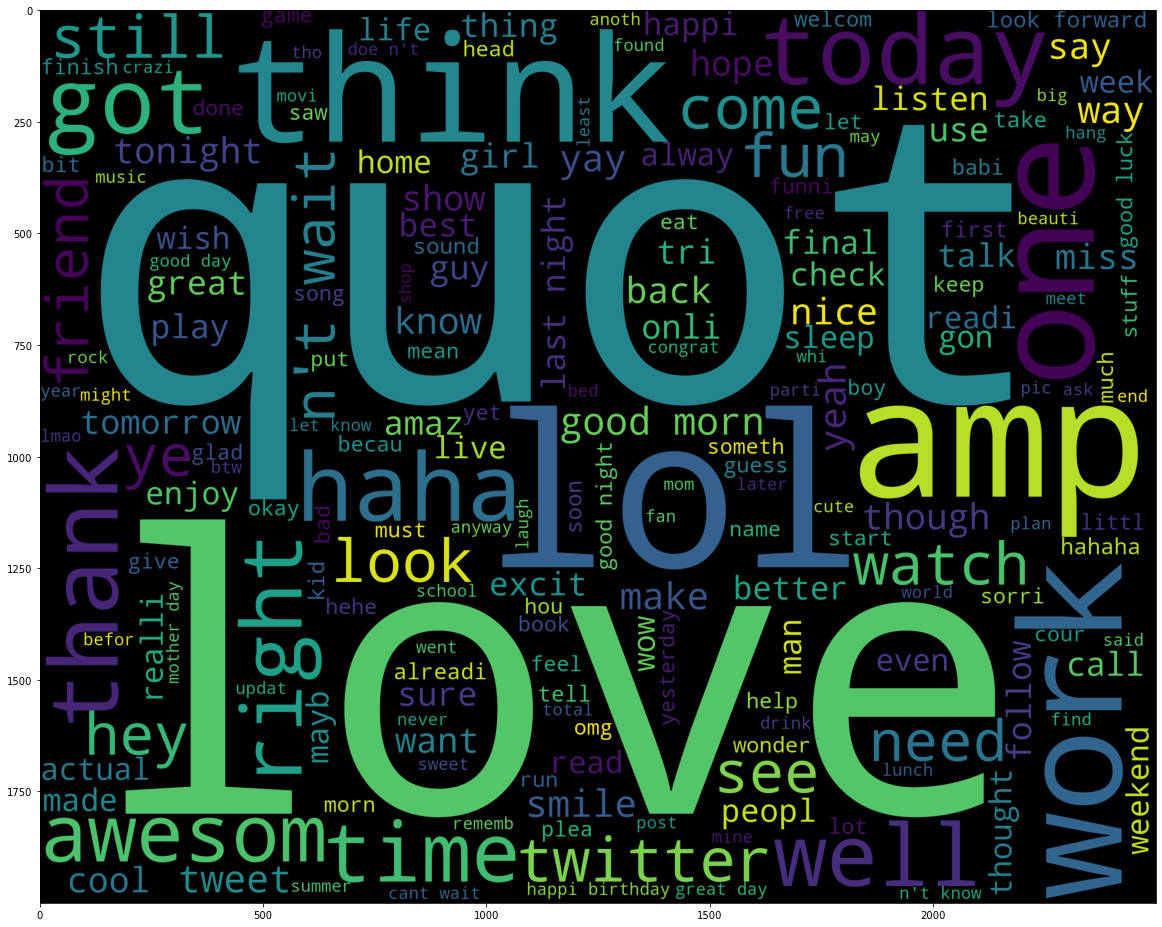

In [74]:
# Word Cloud for Positive Tweets
print('WordCloud for Positive words')
wc = WordCloud(width = 2500 , height = 2000).generate(" ".join(pos_words))
plt.figure(figsize = (20,20))
plt.imshow(wc)

WordCloud for Negative words


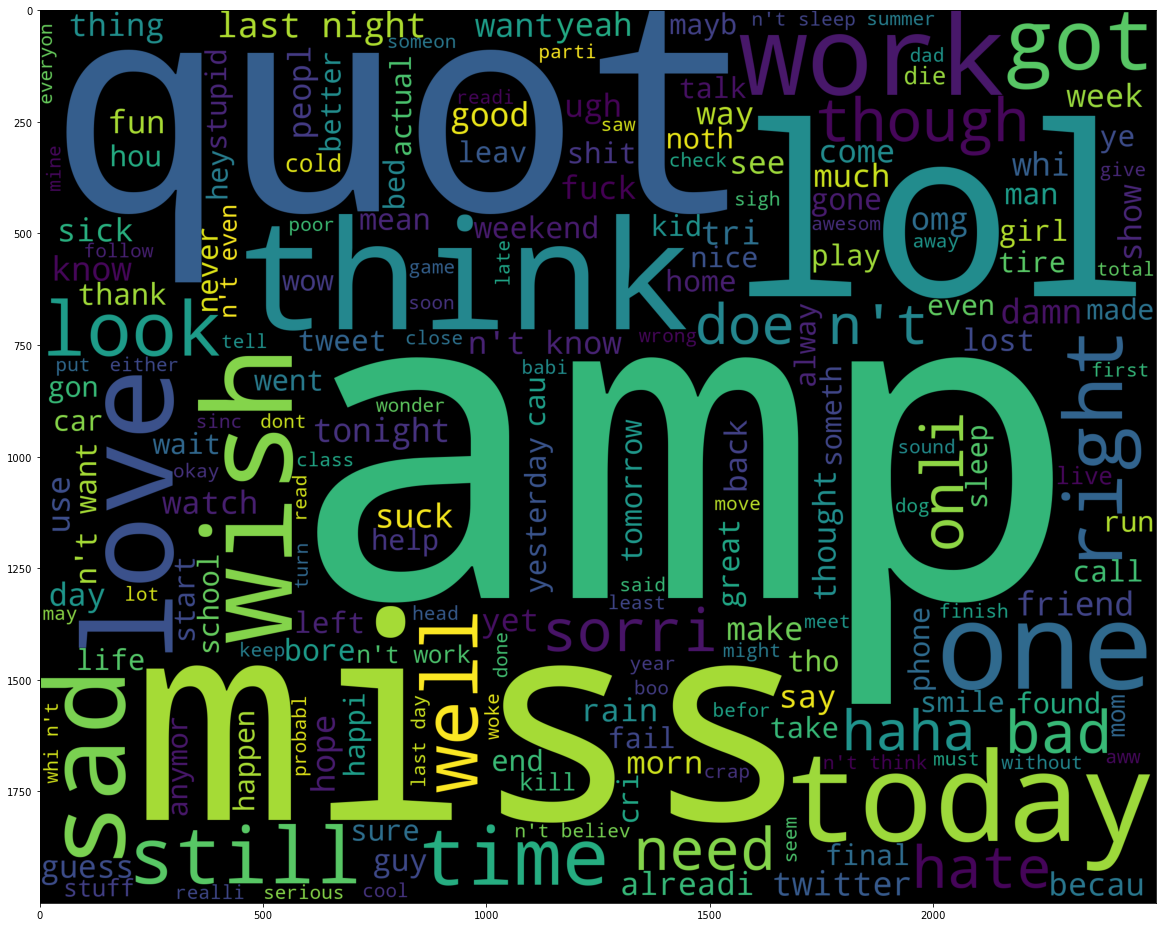

In [75]:
# Word Cloud for Negative Tweets

print('WordCloud for Negative words')

wc = WordCloud(width = 2500 , height = 2000).generate(" ".join(neg_words))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [76]:
X=df1.cleaned_tweets
y=df1.target
X=X.apply(lambda x: " ".join(x))
X

0                                 awww bummer shoulda got david carr third day smile
1          upset n't updat facebook text ... might cri result school today also blah
2                                          dive mani time ball manag save rest bound
3                                                    whole bodi feel itchi like fire
4                                                       behav mad whi becaus n't see
                                             ...                                    
1579781                                                   woke school best feel ever
1579782                          thewdb.com veri cool hear old walt interview ~8bmta
1579783                                                 readi mojo makeov ask detail
1579784                         happi 38th birthday boo alll time tupac amaru shakur
1579785                                                         happi charitytuesday
Name: cleaned_tweets, Length: 1579786, dtype: object

# Split data

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

# Word2Vec

In [137]:
vectorizer= TfidfVectorizer(ngram_range=(1,2))
##.fit(X)
tdidf = vectorizer.fit_transform(X)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.fit_transform(X_test)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

No. of feature_words:  1453242


# Classification model

In [79]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

LinearSVC()

In [80]:
y_pred = SVCmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    235967
           1       0.76      0.79      0.77    237969

    accuracy                           0.77    473936
   macro avg       0.77      0.77      0.77    473936
weighted avg       0.77      0.77      0.77    473936



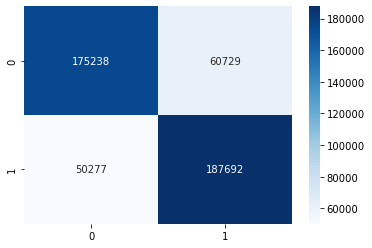

In [81]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Clustring model

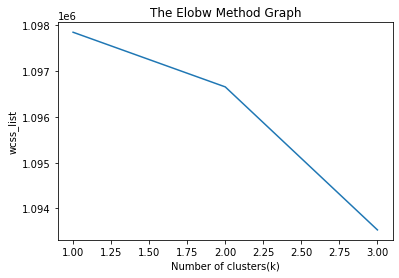

In [138]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 4.  
for i in range(1, 4):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X_train)  
    wcss_list.append(kmeans.inertia_) 
plt.plot(range(1, 4), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

* elbow point is at 2. So the number of clusters here will be 2.

In [83]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42).fit(tfidf) 

In [84]:
#predict test
test=['awww, bummer, shoulda, got, david, carr, third, day, smile']
kmeans.predict(vectorizer.transform(test))

array([0], dtype=int32)

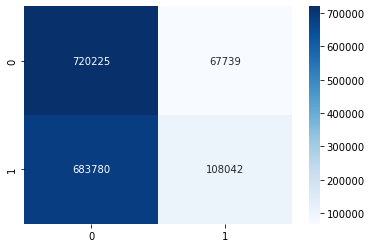

In [85]:
labels = kmeans.labels_
cm = confusion_matrix(y, labels)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")